# Linear Regression

In [73]:
# import numpy as np
from sklearn.datasets import make_regression 
import matplotlib.pyplot as plt

## 1) Dataset

In [2]:
x, y = make_regression(n_samples=100, n_features=1,noise=10)

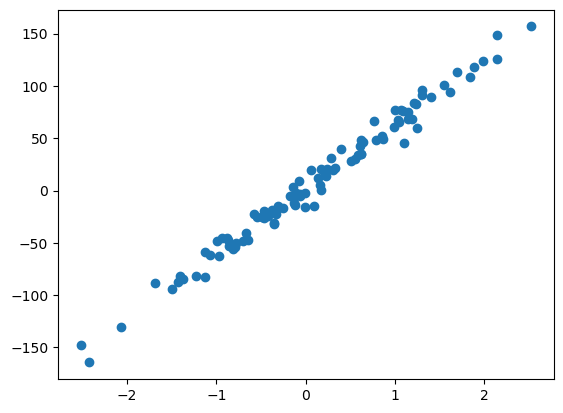

In [9]:
plt.scatter(x,y)

In [14]:
y=y.reshape(y.shape[0],1)

In [15]:
print(x.shape)
print(y.shape)

(100, 1)
(100, 1)


In [21]:
X= np.hstack((x,np.ones(x.shape)))
X

array([[-3.27109999e-01,  1.00000000e+00],
       [ 1.19236404e+00,  1.00000000e+00],
       [ 6.46751099e-01,  1.00000000e+00],
       [ 5.57104324e-01,  1.00000000e+00],
       [ 1.87849884e+00,  1.00000000e+00],
       [-3.05601384e-01,  1.00000000e+00],
       [ 1.10057471e+00,  1.00000000e+00],
       [-3.50242434e-01,  1.00000000e+00],
       [-1.49447322e+00,  1.00000000e+00],
       [ 1.69257584e+00,  1.00000000e+00],
       [ 3.95663159e-01,  1.00000000e+00],
       [ 1.61179443e+00,  1.00000000e+00],
       [ 1.09003110e+00,  1.00000000e+00],
       [-4.18612276e-01,  1.00000000e+00],
       [-8.81806593e-01,  1.00000000e+00],
       [-1.42943370e+00,  1.00000000e+00],
       [ 6.19380755e-01,  1.00000000e+00],
       [ 1.76101862e-01,  1.00000000e+00],
       [ 1.30379472e+00,  1.00000000e+00],
       [-1.24528043e-01,  1.00000000e+00],
       [ 1.20641407e+00,  1.00000000e+00],
       [-8.65872509e-01,  1.00000000e+00],
       [ 1.24854652e+00,  1.00000000e+00],
       [ 2.

In [26]:
theta = np.random.randn(2,1)

theta

array([[-0.83671706],
       [ 1.47025167]])

## 2) Modele Linéaire

In [28]:
def model(X,theta):
    return X.dot(theta)


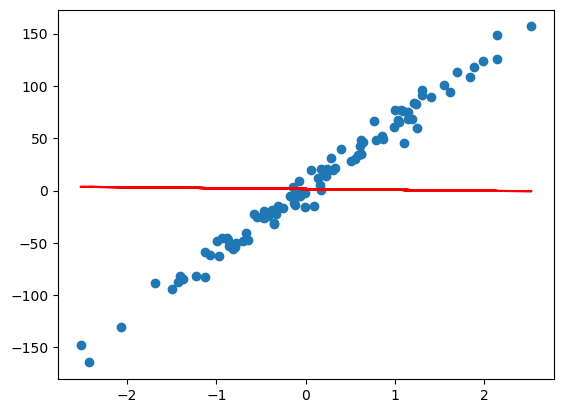

In [36]:
plt.scatter(x,y)
plt.plot(x,model(X,theta),c="r")

## 3) Cost Function : EQR

In [71]:
def cost_function(x,y,theta):
    m= len(y)
    return 1/(2*m) * np.sum((model(x, theta) - y )**2)

In [72]:
cost_function(X,y,theta)

2135.723925543353

## 4) Gradient et descente de gradient

In [44]:
def grad(X,y,theta):
    m= len(y)
    return 1/m * X.T.dot( model(X,theta)- y)

In [57]:
def gradient_descent(X,y,theta, learning_rate,n_iterations):
    cost_history = np.zeros(n_iterations)
    for i in range(0,n_iterations):
        theta=theta - learning_rate * grad(X,y,theta)
        cost_history[i]= cost_function(X,y,theta)
    
    return theta,cost_history

##  5) Machine Learning


In [62]:
theta_final,cost_history = gradient_descent(X,y,theta,learning_rate=0.01,n_iterations=1000)

In [63]:
theta_final

array([[62.24495271],
       [ 1.64918884]])

In [64]:
cost_history

array([2091.06581529, 2047.36603135, 2004.60382365, 1962.75889496,
       1921.81139096, 1881.74189051, 1842.53139611, 1804.16132461,
       1766.61349811, 1729.87013507, 1693.9138416 , 1658.72760292,
       1624.2947751 , 1590.59907685, 1557.62458163, 1525.35570982,
       1493.77722112, 1462.87420711, 1432.63208398, 1403.03658538,
       1374.07375551, 1345.72994225, 1317.99179058, 1290.84623597,
       1264.28049811, 1238.28207462, 1212.83873499, 1187.93851461,
       1163.56970895, 1139.72086788, 1116.38079008, 1093.53851758,
       1071.18333049, 1049.30474172, 1027.89249192, 1006.93654452,
        986.4270808 ,  966.35449518,  946.70939051,  927.48257356,
        908.66505052,  890.24802267,  872.2228821 ,  854.58120753,
        837.31476028,  820.4154802 ,  803.87548187,  787.68705068,
        771.84263919,  756.33486341,  741.15649929,  726.30047917,
        711.75988842,  697.52796208,  683.59808158,  669.96377156,
        656.61869675,  643.55665892,  630.77159387,  618.25756

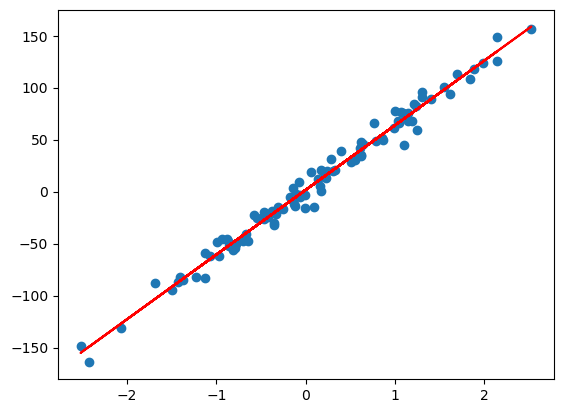

In [65]:
prediction = model(X,theta_final)
plt.scatter(x,y)
plt.plot(x,prediction, c = "r")

## 6) Courbes d'apprentissage

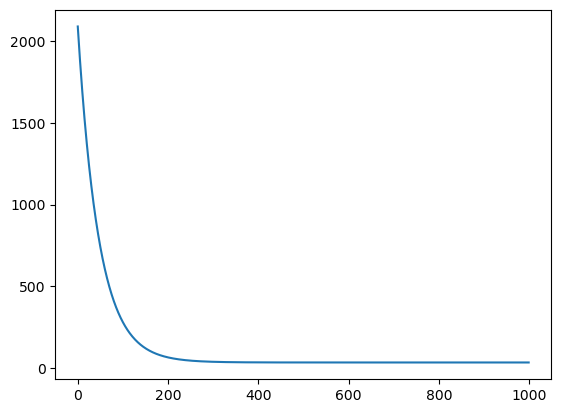

In [67]:
plt.plot(range(1000),cost_history)

 ## 7) Evaluation finale

In [69]:
def coef_determination(y,pred):
    u= ((y-pred)**2).sum()
    v=((y-y.mean())**2).sum()
    return 1- u/v

In [70]:
coef_determination(y,pred=prediction)

0.9835729937989878